In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

%matplotlib notebook

# FALLECIDOS POR COMUNA (GRAN SANTIAGO)

In [2]:
fallecidos_comuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv')


In [3]:
fallecidos_comuna = fallecidos_comuna[(fallecidos_comuna['Region'] == 'Metropolitana')]

In [4]:
fallecidos_comuna = fallecidos_comuna.reset_index(drop=True)
fallecidos_comuna = fallecidos_comuna.drop(['Codigo region', 'Codigo comuna','Region','Poblacion'], axis=1)
fallecidos_comuna = fallecidos_comuna.T
fallecidos_comuna = fallecidos_comuna.rename(columns=fallecidos_comuna.iloc[0]).drop(fallecidos_comuna.index[0])
fallecidos_comuna = fallecidos_comuna.rename_axis('Fecha').reset_index()

In [5]:
fallecidos_comuna.dtypes

Fecha                        object
Alhue                        object
Buin                         object
Calera de Tango              object
Cerrillos                    object
Cerro Navia                  object
Colina                       object
Conchali                     object
Curacavi                     object
El Bosque                    object
El Monte                     object
Estacion Central             object
Huechuraba                   object
Independencia                object
Isla de Maipo                object
La Cisterna                  object
La Florida                   object
La Granja                    object
La Pintana                   object
La Reina                     object
Lampa                        object
Las Condes                   object
Lo Barnechea                 object
Lo Espejo                    object
Lo Prado                     object
Macul                        object
Maipu                        object
Maria Pinto                 

In [6]:
fallecidos_comuna['Fecha'] = pd.to_datetime(fallecidos_comuna['Fecha'])
fallecidos_comuna = fallecidos_comuna.query("Fecha >='2020-12-24'")
fallecidos_comuna = fallecidos_comuna.resample('W', on='Fecha').sum().reset_index()
fallecidos_comuna = fallecidos_comuna.drop(['Desconocido Metropolitana', 'Total'], axis=1)



In [7]:
fallecidos_comuna = fallecidos_comuna.melt(id_vars='Fecha', var_name='Comuna', value_name='Fallecidos')
fallecidos_comuna

,Fecha,Comuna,Fallecidos
0,2020-12-27,Alhue,6.0
1,2021-01-03,Alhue,12.0
2,2021-01-10,Alhue,12.0
3,2021-01-17,Alhue,12.0
4,2021-01-24,Alhue,12.0
...,...,...,...
1503,2021-06-13,Vitacura,229.0
1504,2021-06-20,Vitacura,235.0
1505,2021-06-27,Vitacura,235.0
1506,2021-07-04,Vitacura,238.0


# VACUNACION POR COMUNA (GRAN SANTIAGO)

In [8]:
unicadosis_comuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_UnicaDosis.csv')
primeradosis_comuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv')
segundadosis_comuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis.csv')

In [9]:
unicadosis_comuna = unicadosis_comuna[(unicadosis_comuna['Region'] == 'Metropolitana')]
primeradosis_comuna = primeradosis_comuna[(primeradosis_comuna['Region'] == 'Metropolitana')]
segundadosis_comuna = segundadosis_comuna[(segundadosis_comuna['Region'] == 'Metropolitana')]

In [10]:
unicadosis_comuna = unicadosis_comuna.reset_index(drop=True)
unicadosis_comuna = unicadosis_comuna.drop(['Codigo region', 'Codigo comuna','Region','Poblacion'], axis=1)
unicadosis_comuna = unicadosis_comuna.T
unicadosis_comuna = unicadosis_comuna.rename(columns=unicadosis_comuna.iloc[0]).drop(unicadosis_comuna.index[0])
unicadosis_comuna = unicadosis_comuna.rename_axis('Fecha').reset_index()
unicadosis_comuna['Fecha'] = pd.to_datetime(unicadosis_comuna['Fecha'])
unicadosis_comuna = unicadosis_comuna.query("Fecha >='2020-12-24'")
unicadosis_comuna = unicadosis_comuna.resample('W', on='Fecha').sum().reset_index()
unicadosis_comuna = unicadosis_comuna.drop(['Desconocido Metropolitana'], axis=1)

In [11]:
unicadosis_comuna = unicadosis_comuna.melt(id_vars='Fecha', var_name='Comuna', value_name='Dosis Unica')
unicadosis_comuna

,Fecha,Comuna,Dosis Unica
0,2020-12-27,Alhue,0.0
1,2021-01-03,Alhue,0.0
2,2021-01-10,Alhue,0.0
3,2021-01-17,Alhue,0.0
4,2021-01-24,Alhue,0.0
...,...,...,...
1555,2021-06-20,Vitacura,0.0
1556,2021-06-27,Vitacura,665.0
1557,2021-07-04,Vitacura,319.0
1558,2021-07-11,Vitacura,305.0


In [12]:
primeradosis_comuna = primeradosis_comuna.reset_index(drop=True)
primeradosis_comuna = primeradosis_comuna.drop(['Codigo region', 'Codigo comuna','Region','Poblacion'], axis=1)
primeradosis_comuna = primeradosis_comuna.T
primeradosis_comuna = primeradosis_comuna.rename(columns=primeradosis_comuna.iloc[0]).drop(primeradosis_comuna.index[0])
primeradosis_comuna = primeradosis_comuna.rename_axis('Fecha').reset_index()
primeradosis_comuna['Fecha'] = pd.to_datetime(primeradosis_comuna['Fecha'])
primeradosis_comuna = primeradosis_comuna.query("Fecha >='2020-12-24'")
primeradosis_comuna = primeradosis_comuna.resample('W', on='Fecha').sum().reset_index()
primeradosis_comuna = primeradosis_comuna.drop(['Desconocido Metropolitana'], axis=1)

In [13]:
primeradosis_comuna = primeradosis_comuna.melt(id_vars='Fecha', var_name='Comuna', value_name='Primera Dosis')
primeradosis_comuna

,Fecha,Comuna,Primera Dosis
0,2020-12-27,Alhue,0.0
1,2021-01-03,Alhue,0.0
2,2021-01-10,Alhue,0.0
3,2021-01-17,Alhue,0.0
4,2021-01-24,Alhue,0.0
...,...,...,...
1555,2021-06-20,Vitacura,2142.0
1556,2021-06-27,Vitacura,1275.0
1557,2021-07-04,Vitacura,870.0
1558,2021-07-11,Vitacura,945.0


In [14]:
segundadosis_comuna = segundadosis_comuna.reset_index(drop=True)
segundadosis_comuna = segundadosis_comuna.drop(['Codigo region', 'Codigo comuna','Region','Poblacion'], axis=1)
segundadosis_comuna = segundadosis_comuna.T
segundadosis_comuna = segundadosis_comuna.rename(columns=segundadosis_comuna.iloc[0]).drop(segundadosis_comuna.index[0])
segundadosis_comuna = segundadosis_comuna.rename_axis('Fecha').reset_index()
segundadosis_comuna['Fecha'] = pd.to_datetime(segundadosis_comuna['Fecha'])
segundadosis_comuna = segundadosis_comuna.query("Fecha >='2020-12-24'")
segundadosis_comuna = segundadosis_comuna.resample('W', on='Fecha').sum().reset_index()
segundadosis_comuna = segundadosis_comuna.drop(['Desconocido Metropolitana'], axis=1)

In [15]:
segundadosis_comuna = segundadosis_comuna.melt(id_vars='Fecha', var_name='Comuna', value_name='Segunda Dosis')
segundadosis_comuna

,Fecha,Comuna,Segunda Dosis
0,2020-12-27,Alhue,0.0
1,2021-01-03,Alhue,0.0
2,2021-01-10,Alhue,0.0
3,2021-01-17,Alhue,0.0
4,2021-01-24,Alhue,0.0
...,...,...,...
1555,2021-06-20,Vitacura,3716.0
1556,2021-06-27,Vitacura,4117.0
1557,2021-07-04,Vitacura,3010.0
1558,2021-07-11,Vitacura,2171.0


In [16]:
vacunacion = pd.merge(primeradosis_comuna, segundadosis_comuna)
vacunacion = pd.merge(vacunacion, unicadosis_comuna)

In [17]:
vacunacion['Total Vacunas'] = vacunacion.sum(axis=1)
vacunacion


,Fecha,Comuna,Primera Dosis,Segunda Dosis,Dosis Unica,Total Vacunas
0,2020-12-27,Alhue,0.0,0.0,0.0,0.0
1,2021-01-03,Alhue,0.0,0.0,0.0,0.0
2,2021-01-10,Alhue,0.0,0.0,0.0,0.0
3,2021-01-17,Alhue,0.0,0.0,0.0,0.0
4,2021-01-24,Alhue,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1555,2021-06-20,Vitacura,2142.0,3716.0,0.0,5858.0
1556,2021-06-27,Vitacura,1275.0,4117.0,665.0,6057.0
1557,2021-07-04,Vitacura,870.0,3010.0,319.0,4199.0
1558,2021-07-11,Vitacura,945.0,2171.0,305.0,3421.0


# INDICE DE CALIDAD DE VIDA GRAN SANTIAGO

In [18]:
idh = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
xd = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv')


In [19]:
xd = xd[(xd['Region'] == 'Metropolitana')]
idh = pd.merge(idh, xd, how='left', left_on='comuna', right_on='Codigo comuna')
idh = idh.iloc[:, [5,8]]

In [20]:
idh

,HDI,Comuna
0,0.861222,Santiago
1,0.764616,Cerrillos
2,0.718874,Cerro Navia
3,0.749584,Conchali
4,0.742015,El Bosque
5,0.767604,Estacion Central
6,0.712375,Huechuraba
7,0.763935,Independencia
8,0.850780,La Cisterna
9,0.795888,La Florida


## JUNTANDO TODOS LOS DATAFRAME

In [21]:
df = pd.merge(vacunacion, idh)
df = pd.merge(df, fallecidos_comuna, how='outer')
df = df.fillna(0)
df


,Fecha,Comuna,Primera Dosis,Segunda Dosis,Dosis Unica,Total Vacunas,HDI,Fallecidos
0,2020-12-27,Alhue,0.0,0.0,0.0,0.0,0.742609,6.0
1,2021-01-03,Alhue,0.0,0.0,0.0,0.0,0.742609,12.0
2,2021-01-10,Alhue,0.0,0.0,0.0,0.0,0.742609,12.0
3,2021-01-17,Alhue,0.0,0.0,0.0,0.0,0.742609,12.0
4,2021-01-24,Alhue,0.0,0.0,0.0,0.0,0.742609,12.0
...,...,...,...,...,...,...,...,...
1555,2021-06-20,Vitacura,2142.0,3716.0,0.0,5858.0,0.994584,235.0
1556,2021-06-27,Vitacura,1275.0,4117.0,665.0,6057.0,0.994584,235.0
1557,2021-07-04,Vitacura,870.0,3010.0,319.0,4199.0,0.994584,238.0
1558,2021-07-11,Vitacura,945.0,2171.0,305.0,3421.0,0.994584,239.0


In [22]:
## df2 = df.groupby(['Comuna','HDI']).sum().reset_index()
## df2

In [23]:
XVar = df[['Total Vacunas', 'HDI']]
YVar = df[['Fallecidos']]
XVar

,Total Vacunas,HDI
0,0.0,0.742609
1,0.0,0.742609
2,0.0,0.742609
3,0.0,0.742609
4,0.0,0.742609
...,...,...
1555,5858.0,0.994584
1556,6057.0,0.994584
1557,4199.0,0.994584
1558,3421.0,0.994584


In [24]:
YVar

,Fallecidos
0,6.0
1,12.0
2,12.0
3,12.0
4,12.0
...,...
1555,235.0
1556,235.0
1557,238.0
1558,239.0


In [25]:
mod = sm.OLS(YVar, XVar).fit()

In [26]:
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:             Fallecidos   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              2092.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                        0.00
Time:                        17:16:15   Log-Likelihood:                         -11428.
No. Observations:                1560   AIC:                                  2.286e+04
Df Residuals:                    1558   BIC:                                  2.287e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

<IPython.core.display.Javascript object>


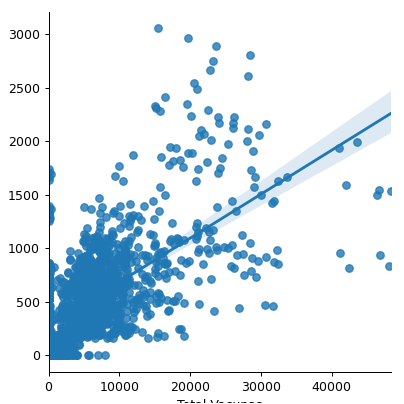

<IPython.core.display.Javascript object>


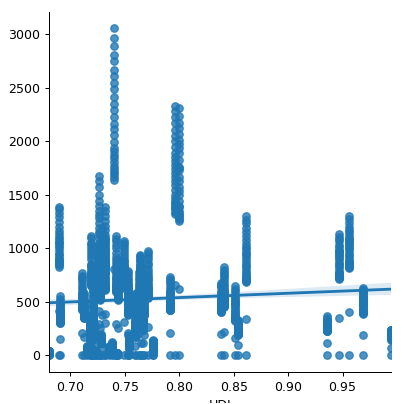

In [49]:
##sb.scatterplot(y='Fallecidos', x='Total Vacunas', hue='Comuna', data=df)

sb.lmplot(x = "Total Vacunas", y = "Fallecidos",data = df)
sb.lmplot(x = "HDI", y = "Fallecidos",data = df)

<AxesSubplot:xlabel='Total Vacunas', ylabel='Fallecidos'>